<a href="https://colab.research.google.com/github/rajgaurang/myprofile/blob/master/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from itertools import product
import warnings
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
bitstamp = pd.read_csv("/content/drive/MyDrive/bitcoin.csv")
bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
bitstamp['Timestamp'] = [datetime.fromtimestamp(x) for x in bitstamp['Timestamp']]

In [ ]:
bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Dataset Shape: ',  bitstamp.shape)

Dataset Shape:  (4857377, 8)


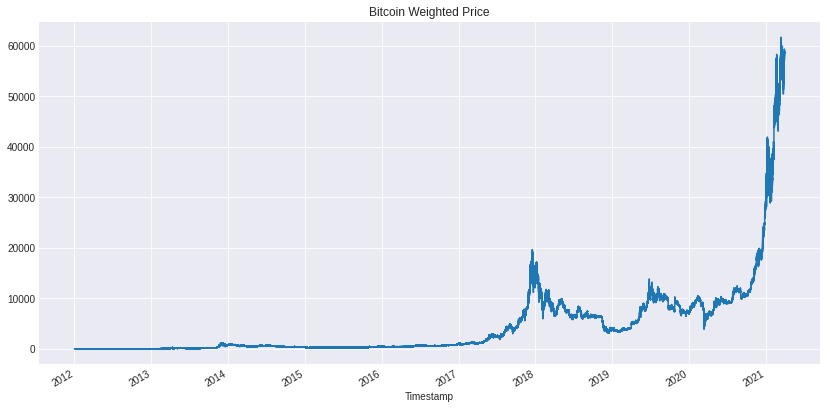

In [ ]:
bitstamp.set_index("Timestamp").Weighted_Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")

In [ ]:
#calculating missing values in the dataset

missing_values = bitstamp.isnull().sum()
missing_per = (missing_values/bitstamp.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Timestamp,0,0.00000
Open,1243608,25.60246
High,1243608,25.60246
Low,1243608,25.60246
Close,1243608,25.60246
Volume_(BTC),1243608,25.60246
Volume_(Currency),1243608,25.60246
Weighted_Price,1243608,25.60246


In [ ]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [ ]:
fill_missing(bitstamp)

            Timestamp  Open  ...  Volume_(Currency)  Weighted_Price
0 2011-12-31 07:52:00  4.39  ...           2.000000            4.39
1 2011-12-31 07:53:00  4.39  ...           2.436653            4.39
2 2011-12-31 07:54:00  4.39  ...           2.873305            4.39
3 2011-12-31 07:55:00  4.39  ...           3.309958            4.39
4 2011-12-31 07:56:00  4.39  ...           3.746611            4.39

[5 rows x 8 columns]
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
bitstamp_non_indexed = bitstamp.copy()

In [ ]:
bitstamp = bitstamp.set_index('Timestamp')
bitstamp.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


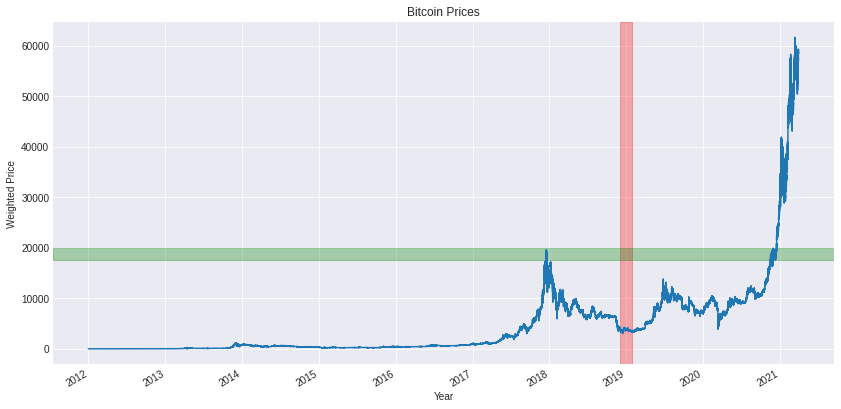

In [ ]:
ax = bitstamp['Weighted_Price'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Price')

ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
ax.axhspan(17500,20000, color='green',alpha=0.3)

Text(0, 0.5, 'Weighted_Price')

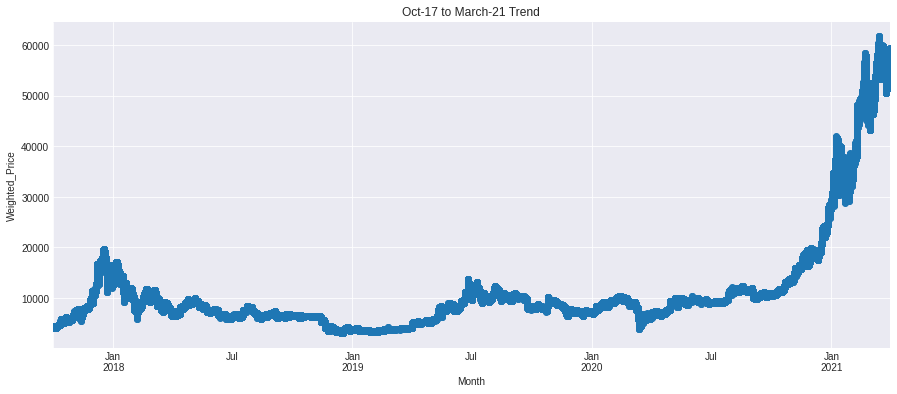

In [ ]:
#Zooming in

ax = bitstamp.loc['2017-10':'2021-03','Weighted_Price'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-21 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Weighted_Price')

No handles with labels found to put in legend.


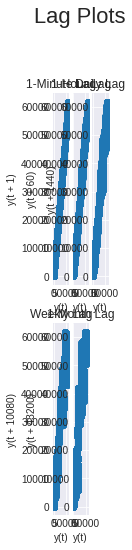

In [ ]:
plt.figure(figsize=(1,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

In [ ]:
hourly_data = bitstamp.resample('1H').mean()
hourly_data = hourly_data.reset_index()

hourly_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.803709,3.528285,4.39
1,2011-12-31 08:00:00,4.39,4.39,4.39,4.39,4.185530,18.374477,4.39
2,2011-12-31 09:00:00,4.39,4.39,4.39,4.39,10.153449,44.573640,4.39
3,2011-12-31 10:00:00,4.39,4.39,4.39,4.39,16.121368,70.772803,4.39
4,2011-12-31 11:00:00,4.39,4.39,4.39,4.39,22.089286,96.971967,4.39


In [ ]:
bitstamp_daily = bitstamp.resample("24H").mean() #daily resampling

In [ ]:
import plotly.express as px

bitstamp_daily.reset_index(inplace=True)
fig = px.line(bitstamp_daily, x='Timestamp', y='Weighted_Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
fill_missing(bitstamp_daily)

   Timestamp      Open  ...  Volume_(Currency)  Weighted_Price
0 2011-12-31  4.476415  ...          79.495594        4.477370
1 2012-01-01  4.765576  ...          32.971105        4.765576
2 2012-01-02  5.006549  ...          75.932706        5.006549
3 2012-01-03  5.206530  ...          40.795994        5.206530
4 2012-01-04  5.202511  ...          72.860096        5.216680

[5 rows x 8 columns]
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


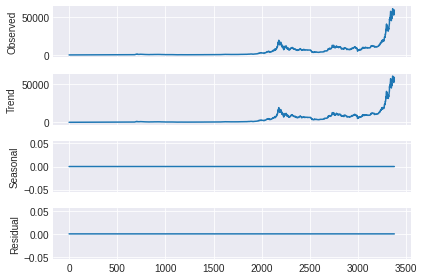

<Figure size 1080x864 with 0 Axes>

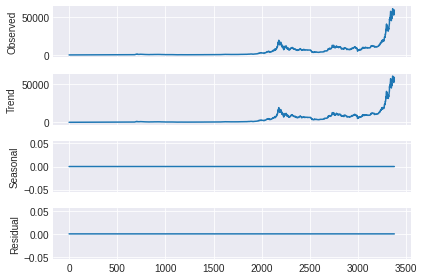

In [ ]:
plt.figure(figsize=(15,12))
series = bitstamp_daily.Weighted_Price
result = seasonal_decompose(series, model='additive',freq=1)
result.plot()

In [ ]:
df = bitstamp_daily.set_index("Timestamp")

In [ ]:
df.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370,4568.640649,4535.780516,4345.894567,112.747300,185.756731,417.815555,4571.885362,4539.008161,4348.997943,112.652701,185.712557,418.084846,4565.245136,4532.401155,4342.638584,112.823368,185.780221,417.508433,4568.632842,4535.771729,4345.881445,112.744372,185.758045,417.825217,9.579974,9.586140,9.601214,3.444517,4.196693,5.179093
2012-01-01,2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576,4.476415,4.476415,4.476415,112.747300,185.756731,417.815555,4.478946,4.478946,4.478946,112.652701,185.712557,418.084846,4.476415,4.476415,4.476415,112.823368,185.780221,417.508433,4.478946,4.478946,4.478946,112.744372,185.758045,417.825217,17.940426,17.940426,17.940426,3.444517,4.196693,5.179093
2012-01-02,2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549,4.620996,4.620996,4.620996,0.204468,0.204468,0.204468,4.622261,4.622261,4.622261,0.202678,0.202678,0.202678,4.620996,4.620996,4.620996,0.204468,0.204468,0.204468,4.622261,4.622261,4.622261,0.202678,0.202678,0.202678,12.365533,12.365533,12.365533,7.884089,7.884089,7.884089
2012-01-03,2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530,4.749513,4.749513,4.749513,0.265431,0.265431,0.265431,4.750357,4.750357,4.750357,0.264130,0.264130,0.264130,4.749513,4.749513,4.749513,0.265431,0.265431,0.265431,4.750357,4.750357,4.750357,0.264130,0.264130,0.264130,13.304813,13.304813,13.304813,5.807423,5.807423,5.807423
2012-01-04,2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680,4.992885,4.863768,4.863768,0.220794,0.314937,0.314937,4.992885,4.864400,4.864400,0.220794,0.313900,0.313900,4.992885,4.863768,4.863768,0.220794,0.314937,0.314937,4.992885,4.864400,4.864400,0.220794,0.313900,0.313900,9.963685,11.957870,11.957870,4.555332,5.453543,5.453543


In [ ]:
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370,4568.640649,4535.780516,4345.894567,112.747300,185.756731,417.815555,4571.885362,4539.008161,4348.997943,112.652701,185.712557,418.084846,4565.245136,4532.401155,4342.638584,112.823368,185.780221,417.508433,4568.632842,4535.771729,4345.881445,112.744372,185.758045,417.825217,9.579974,9.586140,9.601214,3.444517,4.196693,5.179093,12,52,31,5
2012-01-01,2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576,4.476415,4.476415,4.476415,112.747300,185.756731,417.815555,4.478946,4.478946,4.478946,112.652701,185.712557,418.084846,4.476415,4.476415,4.476415,112.823368,185.780221,417.508433,4.478946,4.478946,4.478946,112.744372,185.758045,417.825217,17.940426,17.940426,17.940426,3.444517,4.196693,5.179093,1,52,1,6
2012-01-02,2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549,4.620996,4.620996,4.620996,0.204468,0.204468,0.204468,4.622261,4.622261,4.622261,0.202678,0.202678,0.202678,4.620996,4.620996,4.620996,0.204468,0.204468,0.204468,4.622261,4.622261,4.622261,0.202678,0.202678,0.202678,12.365533,12.365533,12.365533,7.884089,7.884089,7.884089,1,1,2,0
2012-01-03,2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530,4.749513,4.749513,4.749513,0.265431,0.265431,0.265431,4.750357,4.750357,4.750357,0.264130,0.264130,0.264130,4.749513,4.749513,4.749513,0.265431,0.265431,0.265431,4.750357,4.750357,4.750357,0.264130,0.264130,0.264130,13.304813,13.304813,13.304813,5.807423,5.807423,5.807423,1,1,3,1
2012-01-04,2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680,4.992885,4.863768,4.863768,0.220794,0.314937,0.314937,4.992885,4.864400,4.864400,0.220794,0.313900,0.313900,4.992885,4.863768,4.863768,0.220794,0.314937,0.314937,4.992885,4.864400,4.864400,0.220794,0.313900,0.313900,9.963685,11.957870,11.957870,4.555332,5.453543,5.453543,1,1,4,2


In [ ]:
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370,4568.640649,4535.780516,4345.894567,112.747300,185.756731,417.815555,4571.885362,4539.008161,4348.997943,112.652701,185.712557,418.084846,4565.245136,4532.401155,4342.638584,112.823368,185.780221,417.508433,4568.632842,4535.771729,4345.881445,112.744372,185.758045,417.825217,9.579974,9.586140,9.601214,3.444517,4.196693,5.179093,12,52,31,5
2012-01-01,2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576,4.476415,4.476415,4.476415,112.747300,185.756731,417.815555,4.478946,4.478946,4.478946,112.652701,185.712557,418.084846,4.476415,4.476415,4.476415,112.823368,185.780221,417.508433,4.478946,4.478946,4.478946,112.744372,185.758045,417.825217,17.940426,17.940426,17.940426,3.444517,4.196693,5.179093,1,52,1,6
2012-01-02,2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549,4.620996,4.620996,4.620996,0.204468,0.204468,0.204468,4.622261,4.622261,4.622261,0.202678,0.202678,0.202678,4.620996,4.620996,4.620996,0.204468,0.204468,0.204468,4.622261,4.622261,4.622261,0.202678,0.202678,0.202678,12.365533,12.365533,12.365533,7.884089,7.884089,7.884089,1,1,2,0
2012-01-03,2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530,4.749513,4.749513,4.749513,0.265431,0.265431,0.265431,4.750357,4.750357,4.750357,0.264130,0.264130,0.264130,4.749513,4.749513,4.749513,0.265431,0.265431,0.265431,4.750357,4.750357,4.750357,0.264130,0.264130,0.264130,13.304813,13.304813,13.304813,5.807423,5.807423,5.807423,1,1,3,1
2012-01-04,2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680,4.992885,4.863768,4.863768,0.220794,0.314937,0.314937,4.992885,4.864400,4.864400,0.220794,0.313900,0.313900,4.992885,4.863768,4.863768,0.220794,0.314937,0.314937,4.992885,4.864400,4.864400,0.220794,0.313900,0.313900,9.963685,11.957870,11.957870,4.555332,5.453543,5.453543,1,1,4,2


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 8.8MB/s 
     |████████████████████████████████| 9.5MB 29.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
df_train = df[df.Timestamp < "2020"]
df_valid = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (2923, 42)
validation shape : (456, 42)


In [ ]:
import pmdarima as pm

In [ ]:
exogenous_features = ['Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7',
       'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7',
       'Close_std_lag30', 'Volume_(BTC)_mean_lag3', 'Volume_(BTC)_mean_lag7',
       'Volume_(BTC)_mean_lag30', 'Volume_(BTC)_std_lag3',
       'Volume_(BTC)_std_lag7', 'Volume_(BTC)_std_lag30', 'month', 'week',
       'day', 'day_of_week']

In [ ]:
model = pm.auto_arima(df_train.Weighted_Price, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Weighted_Price, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=39224.077, Time=40.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=40299.748, Time=7.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=24.68 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39581.421, Time=31.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40335.387, Time=33.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=39203.214, Time=38.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=39235.720, Time=35.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=39363.405, Time=33.69 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=39200.549, Time=41.32 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=39230.217, Time=38.72 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=39225.845, Time=42.73 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=39237.014, Time=46.70 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=39235.125, Time=46.64 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=39234.628, Time=47.89 sec
 ARIMA(1,0,3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



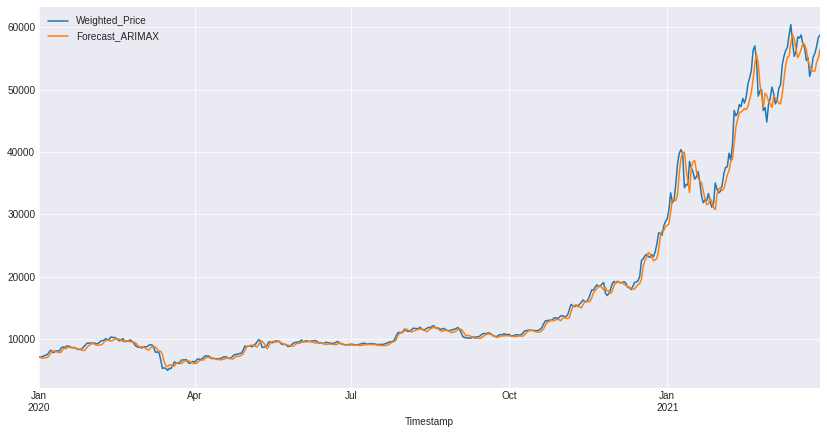

In [ ]:
df_valid[["Weighted_Price", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX)))

print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 1165.141512318165

MAE of Auto ARIMAX: 657.1939439158194


## Facebook Prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
daily_data = bitstamp.resample("24H").mean() #daily resampling
fill_missing(daily_data)

                Open      High  ...  Volume_(Currency)  Weighted_Price
Timestamp                       ...                                   
2011-12-31  4.476415  4.478946  ...          79.495594        4.477370
2012-01-01  4.765576  4.765576  ...          32.971105        4.765576
2012-01-02  5.006549  5.006549  ...          75.932706        5.006549
2012-01-03  5.206530  5.206530  ...          40.795994        5.206530
2012-01-04  5.202511  5.241699  ...          72.860096        5.216680

[5 rows x 7 columns]
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
daily_data_fb = daily_data.reset_index()[['Timestamp','Weighted_Price']].rename({'Timestamp':'ds','Weighted_Price':'y'}, axis=1)
daily_data_fb.head()

,ds,y
0,2011-12-31,4.477370
1,2012-01-01,4.765576
2,2012-01-02,5.006549
3,2012-01-03,5.206530
4,2012-01-04,5.216680


In [ ]:
split_date = "2020-01-01"
train_filt = daily_data_fb['ds'] <= split_date
test_filt = daily_data_fb['ds'] > split_date

train_fb = daily_data_fb[train_filt]
test_fb = daily_data_fb[test_filt]

In [ ]:
print("train data shape :", train_fb.shape)
print("test data shape :", test_fb.shape)

train data shape : (2924, 2)
test data shape : (455, 2)


In [ ]:
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(df_train[["Timestamp", "Weighted_Price"] + exogenous_features].rename(columns={"Timestamp": "ds", "Weighted_Price": "y"}))

forecast = model_fbp.predict(df_valid[["Timestamp", "Weighted_Price"] + exogenous_features].rename(columns={"Timestamp": "ds"}))
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_mean_lag3,Close_mean_lag3_lower,Close_mean_lag3_upper,Close_mean_lag30,Close_mean_lag30_lower,Close_mean_lag30_upper,Close_mean_lag7,Close_mean_lag7_lower,Close_mean_lag7_upper,Close_std_lag3,Close_std_lag3_lower,Close_std_lag3_upper,Close_std_lag30,Close_std_lag30_lower,Close_std_lag30_upper,Close_std_lag7,Close_std_lag7_lower,Close_std_lag7_upper,High_mean_lag3,High_mean_lag3_lower,High_mean_lag3_upper,High_mean_lag30,High_mean_lag30_lower,High_mean_lag30_upper,High_mean_lag7,High_mean_lag7_lower,High_mean_lag7_upper,High_std_lag3,High_std_lag3_lower,High_std_lag3_upper,High_std_lag30,High_std_lag30_lower,High_std_lag30_upper,High_std_lag7,...,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag7_lower,Volume_(BTC)_mean_lag7_upper,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag3_lower,Volume_(BTC)_std_lag3_upper,Volume_(BTC)_std_lag30,Volume_(BTC)_std_lag30_lower,Volume_(BTC)_std_lag30_upper,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag7_lower,Volume_(BTC)_std_lag7_upper,additive_terms,additive_terms_lower,additive_terms_upper,day,day_lower,day_upper,day_of_week,day_of_week_lower,day_of_week_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,month,month_lower,month_upper,week,week_lower,week_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,2697.094994,7118.261251,7723.489342,2697.094994,2697.094994,4789.507847,4789.507847,4789.507847,13.482521,13.482521,13.482521,454.121132,454.121132,454.121132,1131.913316,1131.913316,1131.913316,-196.335373,-196.335373,-196.335373,-417.027538,-417.027538,-417.027538,-1548.482185,-1548.482185,-1548.482185,685.796707,685.796707,685.796707,7667.638325,7667.638325,7667.638325,342.080436,342.080436,342.080436,-1305.145503,-1305.145503,-1305.145503,458.285693,...,-35.909855,-35.909855,-35.909855,-5.599113,-5.599113,-5.599113,-8.593909,-8.593909,-8.593909,20.643309,20.643309,20.643309,4715.226088,4715.226088,4715.226088,12.4598,12.4598,12.4598,-0.513261,-0.513261,-0.513261,4773.261260,4773.261260,4773.261260,106.957106,106.957106,106.957106,95.011173,95.011173,95.011173,0.664994,0.664994,0.664994,-58.700166,-58.700166,-58.700166,0.0,0.0,0.0,7412.321082
1,2020-01-02,2697.181142,7033.989817,7648.215004,2697.181142,2697.181142,4739.162492,4739.162492,4739.162492,13.471689,13.471689,13.471689,453.909674,453.909674,453.909674,-571.583759,-571.583759,-571.583759,-197.466639,-197.466639,-197.466639,-398.912784,-398.912784,-398.912784,-1532.205492,-1532.205492,-1532.205492,685.238408,685.238408,685.238408,7663.927122,7663.927122,7663.927122,-173.750073,-173.750073,-173.750073,-1312.492342,-1312.492342,-1312.492342,437.584436,...,-36.075000,-36.075000,-36.075000,-4.776249,-4.776249,-4.776249,-8.498037,-8.498037,-8.498037,20.304805,20.304805,20.304805,4643.022149,4643.022149,4643.022149,11.6142,11.6142,11.6142,0.000000,0.000000,0.000000,4731.674557,4731.674557,4731.674557,106.957106,106.957106,106.957106,95.011173,95.011173,95.011173,-8.989473,-8.989473,-8.989473,-79.662936,-79.662936,-79.662936,0.0,0.0,0.0,7340.203291
2,2020-01-03,2697.267291,6885.025843,7526.102771,2697.267291,2697.267291,4663.217420,4663.217420,4663.217420,13.448321,13.448321,13.448321,451.870697,451.870697,451.870697,861.442944,861.442944,861.442944,-192.671177,-192.671177,-192.671177,-128.584540,-128.584540,-128.584540,-1507.713711,-1507.713711,-1507.713711,684.045517,684.045517,684.045517,7629.463831,7629.463831,7629.463831,255.687932,255.687932,255.687932,-1280.324971,-1280.324971,-1280.324971,141.874048,...,-35.712788,-35.712788,-35.712788,-4.636146,-4.636146,-4.636146,-8.522766,-8.522766,-8.522766,19.923525,19.923525,19.923525,4509.543737,4509.543737,4509.543737,10.7686,10.7686,10.7686,0.513261,0.513261,0.513261,4617.790155,4617.790155,4617.790155,106.957106,106.957106,106.957106,95.011173,95.011173,95.011173,-8.429995,-8.42999

In [ ]:
df_valid["Forecast_Prophet"] = forecast.yhat.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



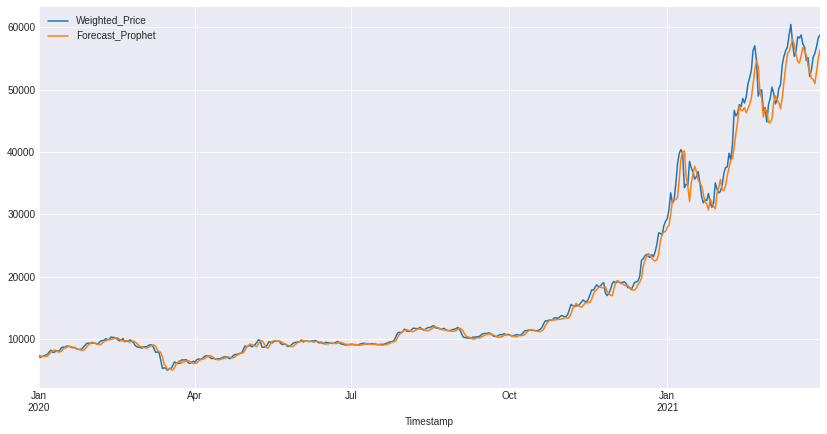

In [ ]:
df_valid[["Weighted_Price", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [ ]:
test_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet'])
test_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet']))

print(f" Prophet's MAE : {test_mae}")
print(f"Prophet's RMSE : {test_rmse}")

 Prophet's MAE : 684.8617395159514
Prophet's RMSE : 1300.8177166570993


**XG Boost**

In [ ]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

from datetime import datetime

In [ ]:
X_train, y_train = df_train[exogenous_features], df_train.Weighted_Price
X_test, y_test = df_valid[exogenous_features], df_valid.Weighted_Price

In [ ]:
reg = xgb.XGBRegressor()

In [ ]:

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],  
 
}

In [ ]:
model  = RandomizedSearchCV(    
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [ ]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.3min finished


[22:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                  

In [ ]:
df_valid['Forecast_XGBoost'] = model.predict(X_test)

overall_data = pd.concat([df_train, df_valid], sort=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



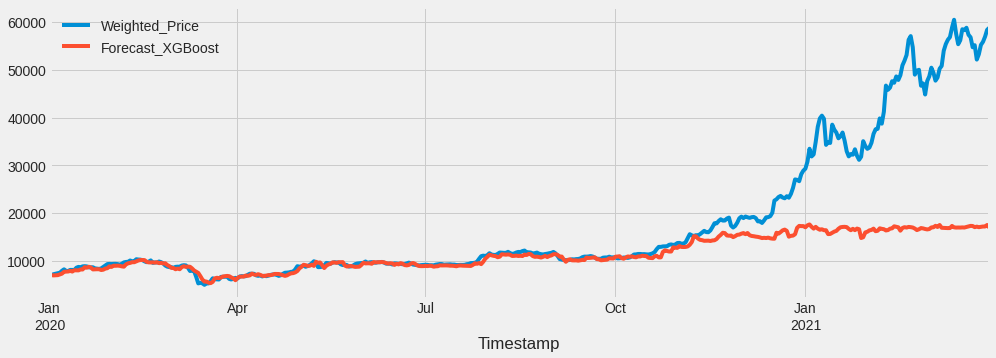

In [ ]:
df_valid[['Weighted_Price','Forecast_XGBoost']].plot(figsize=(15, 5))

In [ ]:
test_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost'])
test_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost']))


print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")


test MAE : 6393.130102415225
test RMSE : 13356.43559358792


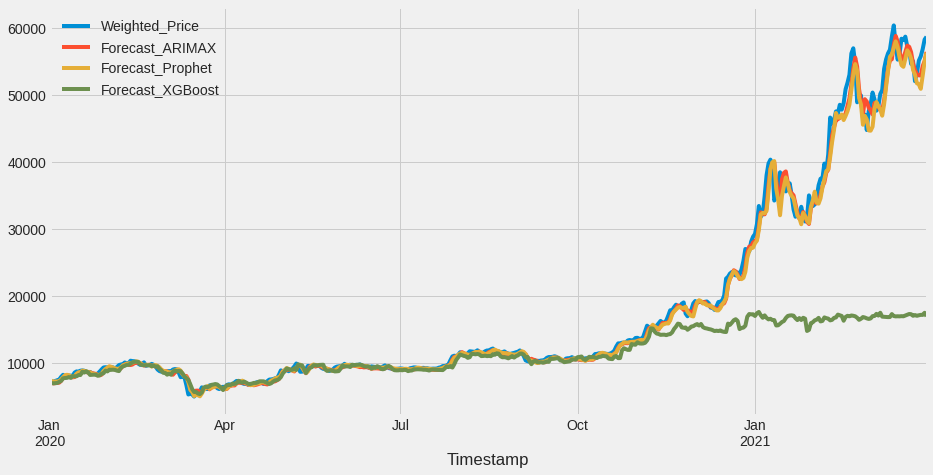

In [ ]:
df_valid[["Weighted_Price", "Forecast_ARIMAX", "Forecast_Prophet", "Forecast_XGBoost"]].plot(figsize=(14,7))

In [ ]:
arimax_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_ARIMAX']))
fbp_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet']))
xgb_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost']))

arimax_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_ARIMAX'])
fbp_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet'])
xgb_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost'])


print("ARIMAX RMSE :", arimax_rmse)
print("FB Prophet RMSE :", fbp_rmse)
print("XGBoost RMSE :", xgb_rmse)

print("\nARIMAX MAE :", arimax_mae)
print("FB Prophet MAE :", fbp_mae)
print("XGBoost MAE :", xgb_mae)

ARIMAX RMSE : 1165.141512318165
FB Prophet RMSE : 1300.8177166570993
XGBoost RMSE : 13356.43559358792

ARIMAX MAE : 657.1939439158194
FB Prophet MAE : 684.8617395159514
XGBoost MAE : 6393.130102415225
